In [43]:
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
def print_dict_with_rank(title, d, top=20):
    print(f"\n-------- {title} --------")
    rank = 1
    for key, value in sorted(d.items(), key=lambda item: item[1], reverse=True)[:top]:
        print(f"{rank:>2} {key}: {value}")
        rank += 1


In [45]:
letter_freq = defaultdict(int)
letter_freq_in_position = defaultdict(lambda: defaultdict(int))
with open("five_letter_words.txt") as word_list:
    for word in word_list:
        word = word.rstrip()
        position = 0
        for letter in word:
            letter = letter.upper()
            letter_freq[letter] += 1
            letter_freq_in_position[letter][position] += 1
            position += 1

print("-------- Letters sorted in alphabetical order --------")
for letter, freq in sorted(letter_freq.items()):
    print(f"{letter.upper()}: {freq}")


-------- Letters sorted in alphabetical order --------
A: 2348
B: 715
C: 964
D: 1181
E: 3009
F: 561
G: 679
H: 814
I: 1592
J: 89
K: 596
L: 1586
M: 843
N: 1285
O: 1915
P: 955
Q: 53
R: 1910
S: 3033
T: 1585
U: 1089
V: 318
W: 505
X: 139
Y: 886
Z: 135


In [46]:
print_dict_with_rank("Letters sorted by frequency", letter_freq, 26)


-------- Letters sorted by frequency --------
 1 S: 3033
 2 E: 3009
 3 A: 2348
 4 O: 1915
 5 R: 1910
 6 I: 1592
 7 L: 1586
 8 T: 1585
 9 N: 1285
10 D: 1181
11 U: 1089
12 C: 964
13 P: 955
14 Y: 886
15 M: 843
16 H: 814
17 B: 715
18 G: 679
19 K: 596
20 F: 561
21 W: 505
22 V: 318
23 X: 139
24 Z: 135
25 J: 89
26 Q: 53


In [47]:
words_with_freq_weight = {}
words_with_freq_and_position_weight = {}
with open("five_letter_words.txt") as word_list:
    for word in word_list:
        word = word.rstrip()
        freq_weight = 0
        freq_and_position_weight = 0
        letters_in_word = set()
        position = 0
        for letter in word:
            letter = letter.upper()
            freq_weight += letter_freq[letter]
            freq_and_position_weight += letter_freq[letter] * letter_freq_in_position[letter][position]
            letters_in_word.add(letter)
            position += 1
        if len(letters_in_word) == 5:
            words_with_freq_weight[word] = freq_weight
            words_with_freq_and_position_weight[word] = freq_and_position_weight


In [48]:
print_dict_with_rank("Top words with most frequent unrepeated letters", words_with_freq_weight)
print_dict_with_rank("Top words with most frequent unrepeated letters weighted by letter position",
                     words_with_freq_and_position_weight)


-------- Top words with most frequent unrepeated letters --------
 1 arose: 12215
 2 raise: 11892
 3 arise: 11892
 4 aloes: 11891
 5 stoae: 11890
 6 laser: 11886
 7 earls: 11886
 8 reals: 11886
 9 tears: 11885
10 rates: 11885
11 stare: 11885
12 aster: 11885
13 tares: 11885
14 snare: 11585
15 earns: 11585
16 nears: 11585
17 saner: 11585
18 nares: 11585
19 aisle: 11568
20 least: 11561

-------- Top words with most frequent unrepeated letters weighted by letter position --------
 1 tares: 12732114
 2 cares: 12560314
 3 pares: 12504784
 4 dares: 12503445
 5 bares: 12445034
 6 tales: 12440232
 7 mares: 12387368
 8 hares: 12330700
 9 fares: 12314552
10 nares: 12287784
11 wares: 12251294
12 pales: 12212902
13 dales: 12211563
14 lanes: 12185560
15 rates: 12184584
16 canes: 12179914
17 bales: 12153152
18 lores: 12126885
19 panes: 12124384
20 cores: 12121239


In [49]:
# --- Chart letter frequencies by position
freq_in_position_by_letter_with_letter = {}
freq_in_position_by_letter = {}
for letter, total_freq in sorted(letter_freq.items(), key=lambda item: item[1], reverse=True):
    positions = letter_freq_in_position[letter]
    for position in positions:
        freq_in_position_by_letter_with_letter[letter] = [letter.upper(),
                                                          *[positions.get(position, 0) for position in range(5)]]
        freq_in_position_by_letter[letter] = [positions.get(position, 0) for position in range(5)]
df = pd.DataFrame(freq_in_position_by_letter_with_letter)
df = df.transpose().loc[::-1]  # .loc[::-1] will reverse the order

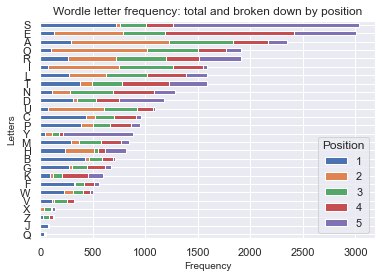

In [50]:
df.set_index(0).plot(kind='barh', stacked=True)
plt.legend(title="Position")
plt.title("Wordle letter frequency: total and broken down by position")
plt.xlabel("Frequency")
plt.ylabel("Letters")
plt.show()

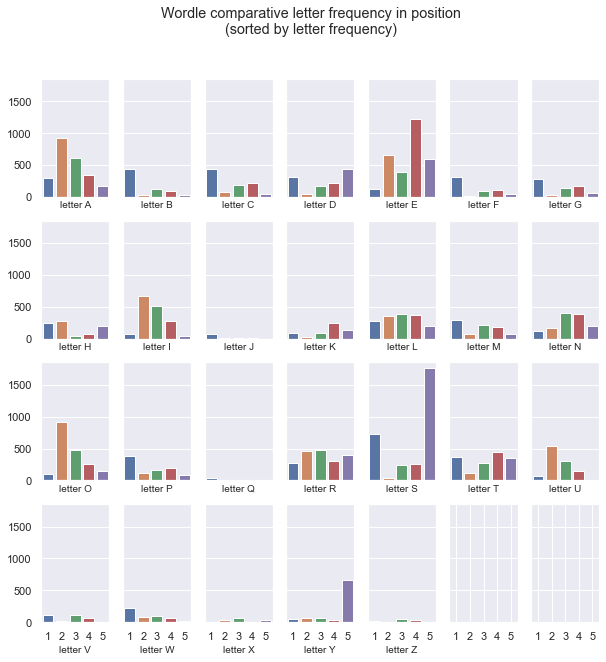

In [51]:
sns.set(style="darkgrid", rc={'axes.labelsize': 10})
fig, axs = plt.subplots(4, 7, figsize=(10, 10), sharex=True, sharey=True)
x_labels = [x + 1 for x in range(5)]
for row in range(4):
    for col in range(7):
        letter = chr(ord('A') + (row * 7) + col)
        if letter <= 'Z':
            sns.barplot(x=x_labels, y=freq_in_position_by_letter[letter], ax=axs[row, col]) \
                .set_xlabel(f"letter {letter.upper()}")
plt.suptitle("Wordle comparative letter frequency in position\n(sorted by letter frequency)")
plt.show()